First perform the steps in `tabular_analysis_R.ipynb`, then run this notebook.

In [1]:
import skimage as ski

In [2]:
img = ski.io.imread("images/1_1.png")

In [3]:
img.shape

(337, 450, 3)

In [4]:
import matplotlib.pyplot as plt

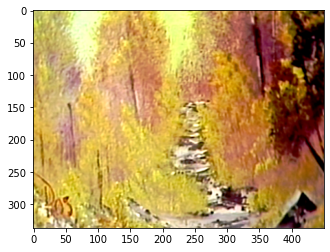

In [5]:
plt.imshow(img)

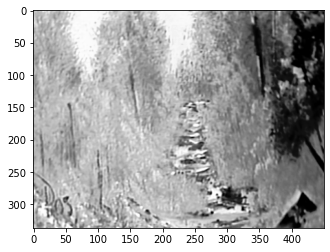

In [6]:
gray_img = ski.color.rgb2gray(img)
plt.imshow(gray_img, cmap="gray")

In [7]:
gray_img.mean()

0.592761288612194

In [8]:
from glob import glob

In [9]:
images = sorted(glob("images/*.png"), key=lambda x: list(map(int, x.split("/")[1].replace(".png","").split("_"))))

In [10]:
import pandas as pd

In [11]:
rows = []
for image in images:
    img = ski.io.imread(image)
    gray_img = ski.color.rgb2gray(img)
    row = {"season": int(image.split("/")[1].split("_")[0]), "episode": int(image.split("_")[1].split(".")[0])}
    row["mean_brightness"] = gray_img.mean()
    rows.append(row)
df = pd.DataFrame.from_records(rows)

In [12]:
df

,season,episode,mean_brightness
0,1,1,0.592761
1,1,2,0.724596
2,1,3,0.146882
3,1,4,0.604543
4,1,5,0.665945
...,...,...,...
398,31,9,0.262138
399,31,10,0.287012
400,31,11,0.386162
401,31,12,0.409801


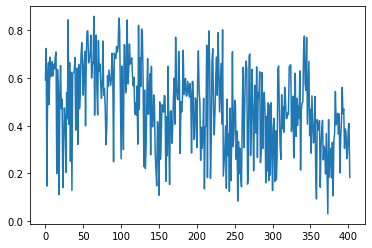

In [13]:
plt.plot(df.mean_brightness)

In [19]:
import seaborn as sns

In [34]:
df = df.reset_index()

In [35]:
df

,index,season,episode,mean_brightness
0,0,1,1,0.592761
1,1,1,2,0.724596
2,2,1,3,0.146882
3,3,1,4,0.604543
4,4,1,5,0.665945
...,...,...,...,...
398,398,31,9,0.262138
399,399,31,10,0.287012
400,400,31,11,0.386162
401,401,31,12,0.409801


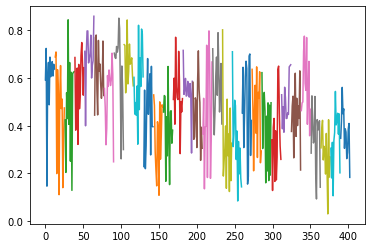

In [18]:
for season in df.groupby("season"):
    plt.plot(season[1].mean_brightness)

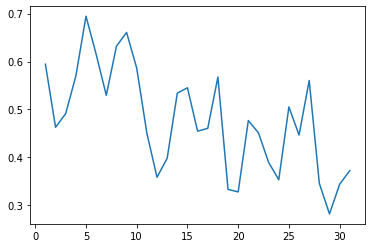

In [21]:
plt.plot(df.groupby("season").mean().mean_brightness)

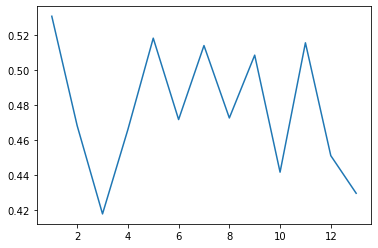

In [22]:
plt.plot(df.groupby("episode").mean().mean_brightness)

<AxesSubplot:xlabel='index', ylabel='mean_brightness'>

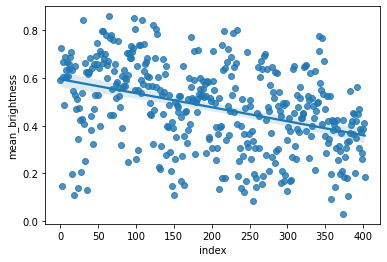

In [36]:
sns.regplot(df, x="index", y="mean_brightness")